In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [11]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [12]:
dataset.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

In [21]:
X = dataset['Level'].values
y = dataset['Salary'].values

In [22]:
print(X)

[ 1  2  3  4  5  6  7  8  9 10]


In [23]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [25]:
X = X.reshape(len(X),1)
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [26]:
y = y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

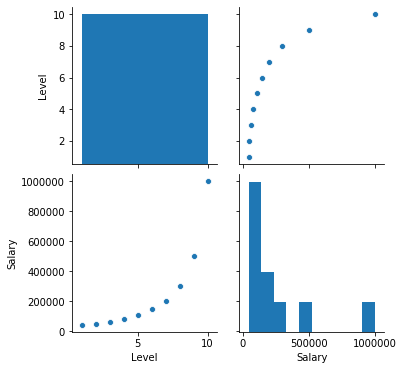

In [16]:
sns.pairplot(dataset)

In [31]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X =sc_x.fit_transform(X)
y = sc_y.fit_transform(y)

In [32]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [33]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [34]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X, y)

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [36]:
sc_y.inverse_transform(svr.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

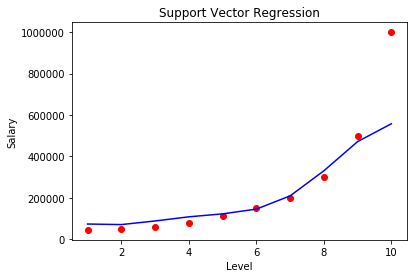

In [38]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y),color = 'red')
plt.plot(sc_x.inverse_transform(X),sc_y.inverse_transform(svr.predict(X)),color = 'blue')
plt.title('Support Vector Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()